In [ ]:
attach(cars)
head(cars)

The following objects are masked from cars (pos = 3):

    dist, speed


The following objects are masked from cars (pos = 4):

    dist, speed


The following objects are masked from cars (pos = 5):

    dist, speed


The following objects are masked from cars (pos = 6):

    dist, speed




,speed,dist
,<dbl>,<dbl>
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16
6,9,10


[1] 50

In [ ]:
model <- lm(dist ~ speed, data = cars)
summary(model)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


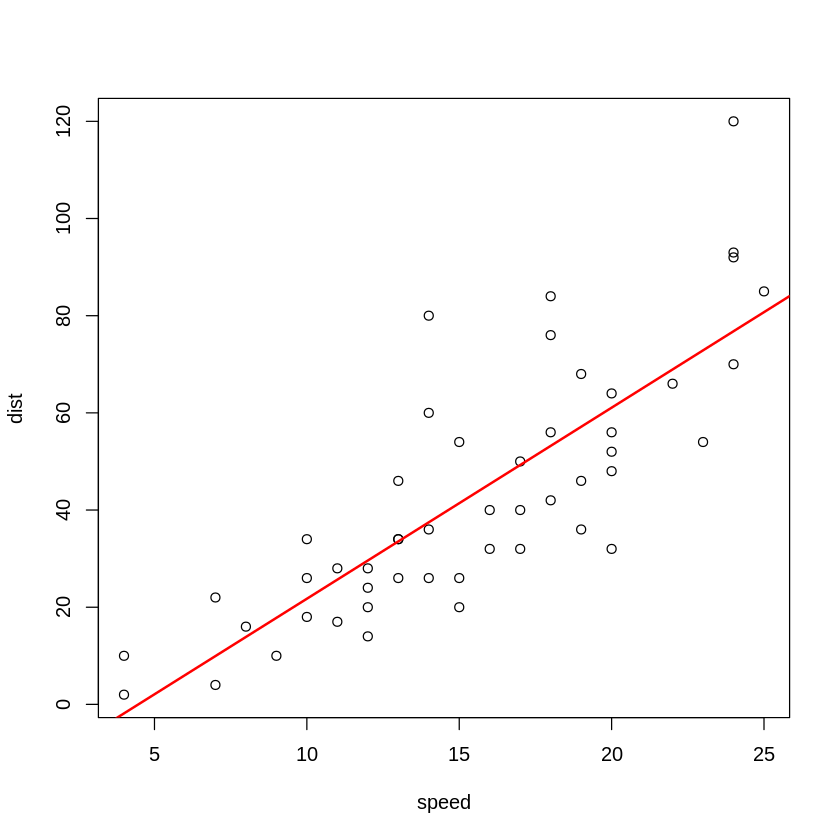

In [ ]:
plot(speed, dist)
abline(model, col="red", lwd=2)

In [ ]:
confint(model, level=0.95)

,2.5 %,97.5 %
(Intercept),-31.167850,-3.990340
speed,3.096964,4.767853


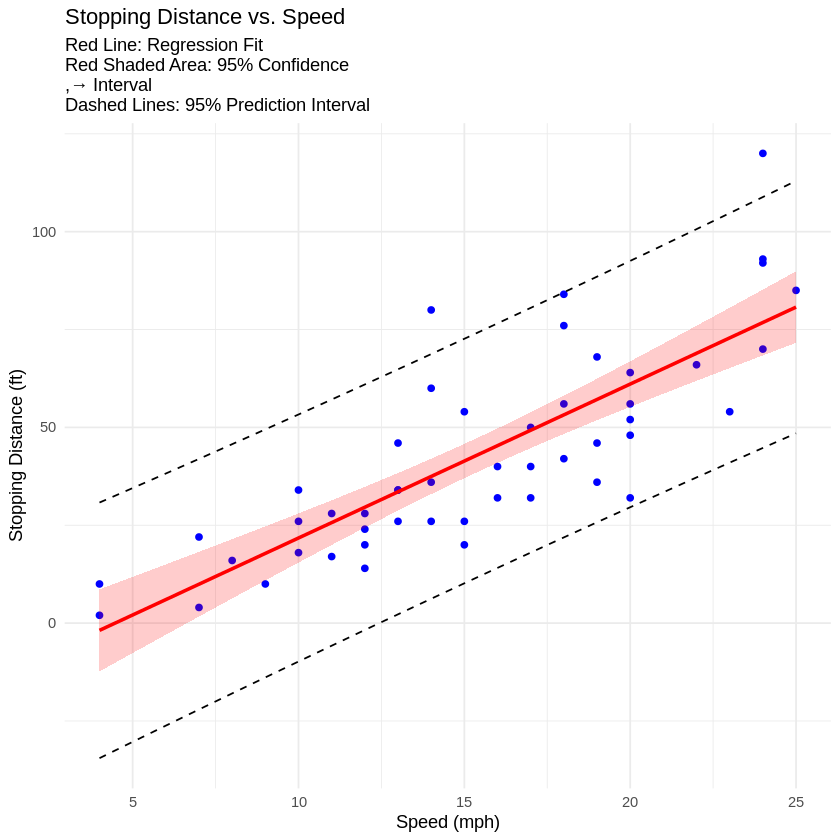

In [ ]:
# Load the ggplot2 library
library(ggplot2)
# Create a sequence of speed values for prediction
speed_grid <- data.frame(speed = seq(min(cars$speed), max(cars$speed), length.out = 100))
# Calculate the confidence interval
conf_interval <- predict(model, newdata = speed_grid, interval = "confidence", level = 0.95)
# Calculate the prediction interval
pred_interval <- predict(model, newdata = speed_grid, interval = "prediction", level = 0.95)
# Combine the results into one data frame
plot_data <- cbind(speed_grid, conf_interval)
plot_data$pred_lwr <- pred_interval[, "lwr"]
plot_data$pred_upr <- pred_interval[, "upr"]
# Create the plot
ggplot(cars, aes(x = speed, y = dist)) +
geom_point(color = "blue") +
geom_line(data = plot_data, aes(y = fit), color = "red", linewidth = 1) +
geom_ribbon(data = plot_data, aes(ymin = lwr, ymax = upr, y = NULL), alpha = 0.2, fill = "red") +
geom_line(data = plot_data, aes(y = pred_lwr), color = "black", linetype = "dashed") +
geom_line(data = plot_data, aes(y = pred_upr), color = "black", linetype = "dashed") +
labs(title = "Stopping Distance vs. Speed",
subtitle = "Red Line: Regression Fit\nRed Shaded Area: 95% Confidence
,→ Interval\nDashed Lines: 95% Prediction Interval",
x = "Speed (mph)",
y = "Stopping Distance (ft)") +
theme_minimal()


In [ ]:
plot_data

,speed,fit,lwr,upr,pred_lwr,pred_upr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,4.000000,-1.8494599,-12.3295433,8.630624,-34.499842,30.80092
2,4.212121,-1.0153125,-11.3346115,9.303986,-33.614442,31.58382
3,4.424242,-0.1811652,-10.3402263,9.977896,-32.729926,32.36760
4,4.636364,0.6529821,-9.3464142,10.652378,-31.846299,33.15226
5,4.848485,1.4871294,-8.3532028,11.327462,-30.963564,33.93782
6,5.060606,2.3212767,-7.3606220,12.003175,-30.081725,34.72428
7,5.272727,3.1554240,-6.3687031,12.679551,-29.200786,35.51163
8,5.484848,3.9895713,-5.3774795,13.356622,-28.320752,36.29989
9,5.696970,4.8237186,-4.3869869,14.034424,-27.441625,37.08906
